# Global Power Plant Database

### Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


In [1]:
#importing required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Importing the dataset
data =  pd.read_csv("global_power_plant.csv")
data.shape


(907, 27)

In [3]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')


### Key attributes of the database

The database includes the following indicators:

country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification 

country_long (text): longer form of the country designation

name (text): name or title of the power plant, generally in Romanized form

gppd_idnr (text): 10 or 12 character identifier for the power plant

capacity_mw (number): electrical generating capacity in megawatts

latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

primary_fuel (text): energy source used in primary electricity generation or export

other_fuel1 (text): energy source used in electricity generation or export

other_fuel2 (text): energy source used in electricity generation or export

other_fuel3 (text): energy source used in electricity generation or export

commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available

owner (text): majority shareholder of the power plant, generally in Romanized form

source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

url (text): web document corresponding to the source field

geolocation_source (text): attribution for geolocation information

wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

year_of_capacity_data (number): year the capacity information was reported

generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013

generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014

generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017

generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018

generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019

generation_data_source (text): attribution for the reported generation information

estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013

estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014

estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015

estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016

estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017

estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013

estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014

estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015

estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016

estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Dataset contain 907 rows with 27 columns.

Some of feature are with object datatypes and other with float.

other_fuel3,estimated_generation_gwh,generation_gwh_2013,generation_gwh_2019,wepp_id,other_fuel2 are empty columns.

In [6]:
# Lets check the duplicate values
data.duplicated().sum()

0

In [7]:
#Before checking the missing values ,first we need to remove empty columns.
data1 = data.copy()
data1.drop(columns=["country","country_long",'url','year_of_capacity_data','generation_gwh_2013',
                 'gppd_idnr','owner','other_fuel3','other_fuel2','generation_gwh_2019',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)


In [8]:
# Finding the percentage of data is missing from the dataset
missing_val= data1.isnull().sum().sort_values(ascending = False)
missing_percentage =(missing_val/len(data))*100
print(pd.concat([missing_val, missing_percentage], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
latitude                            46        5.071665
longitude                           46        5.071665
geolocation_source                  19        2.094818
name                                 0        0.000000
capacity_mw                          0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000


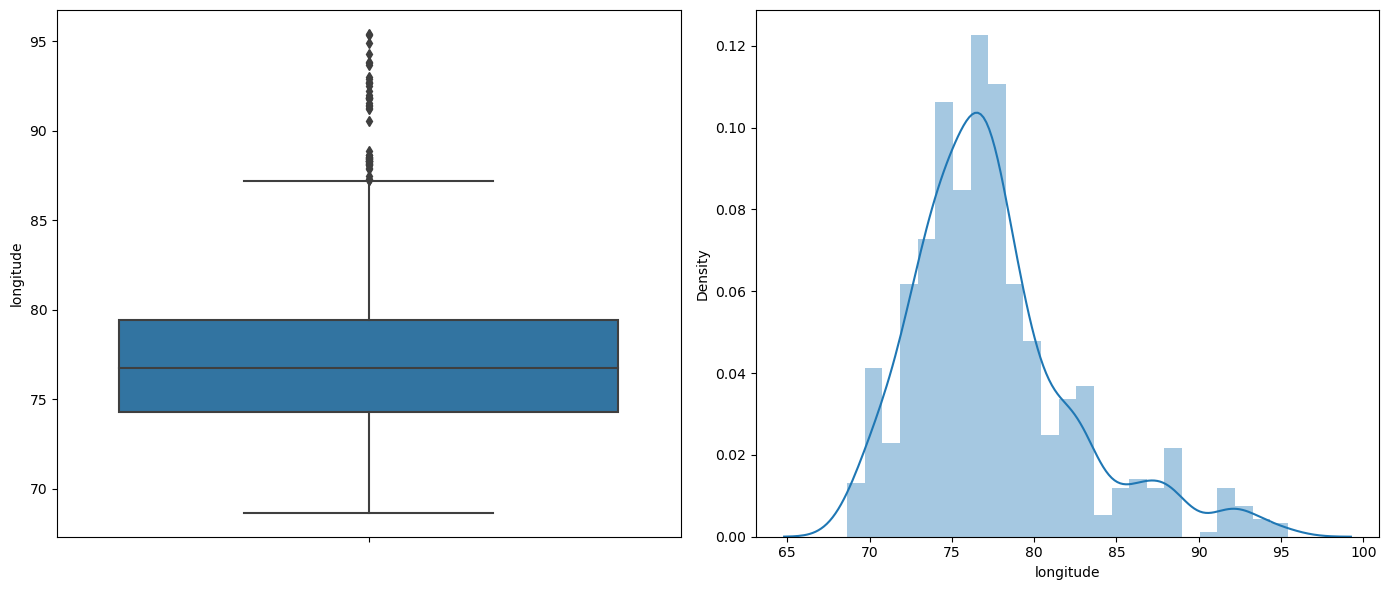

In [9]:
# Checking the distributation of longitude column
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=data1)
plt.ylabel('longitude')
plt.subplot(1,2,2)
sns.distplot(data1['longitude'])
plt.xlabel('longitude')
plt.tight_layout()
plt.show()

As we can see there are some outliers in the longitude column.

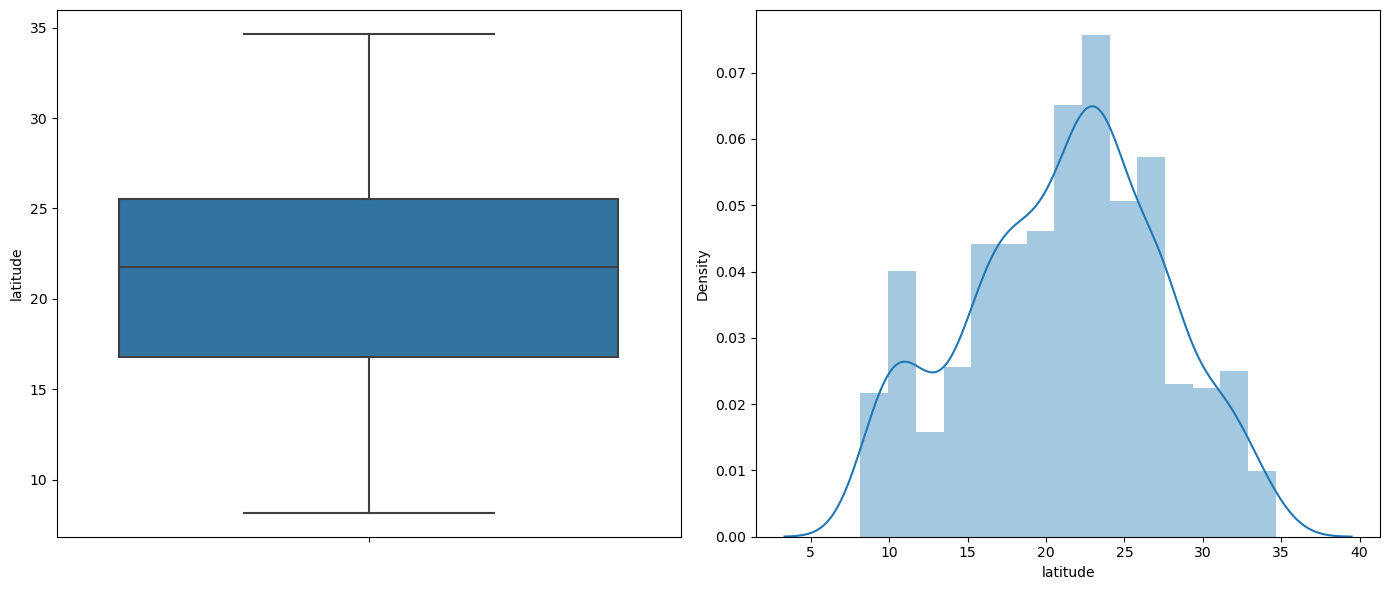

In [10]:
# Checking the distributation of latitude column
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude',data = data1)
plt.ylabel('latitude')
plt.subplot(1,2,2)
sns.distplot(data1['latitude'])
plt.xlabel('latitude')
plt.tight_layout()
plt.show()

No outliers are present in latitude column

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    907 non-null    object 
 1   capacity_mw             907 non-null    float64
 2   latitude                861 non-null    float64
 3   longitude               861 non-null    float64
 4   primary_fuel            907 non-null    object 
 5   other_fuel1             198 non-null    object 
 6   commissioning_year      527 non-null    float64
 7   source                  907 non-null    object 
 8   geolocation_source      888 non-null    object 
 9   generation_gwh_2014     398 non-null    float64
 10  generation_gwh_2015     422 non-null    float64
 11  generation_gwh_2016     434 non-null    float64
 12  generation_gwh_2017     440 non-null    float64
 13  generation_gwh_2018     448 non-null    float64
 14  generation_data_source  449 non-null    ob

In [12]:
# Lets handle the missing values in latitude and longitude columns
data1['longitude'] = data1['longitude'].fillna(data1['longitude'].median())
data1['latitude'] = data1['latitude'].fillna(data1['latitude'].mean())

In [13]:
# As Geolocation source is categorical data we can impute it with mode of category.
data1['geolocation_source'] = data1['geolocation_source'].fillna(data1['geolocation_source'].mode()[0])

In [14]:
# Finding the percentage of data is missing from the dataset
missing_val= data1.isnull().sum().sort_values(ascending = False)
missing_percentage =(missing_val/len(data))*100
print(pd.concat([missing_val, missing_percentage], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
name                                 0        0.000000
capacity_mw                          0        0.000000
latitude                             0        0.000000
longitude                            0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000
geolocation_source                   0        0.000000


In [15]:
# Statistical Summary
data1.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.427103,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.815073,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.281800,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.176450,79.206100,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


Bigest Powerplant has power generation capacity of 4760.000000 MW.

In each generation_gwh columns mean is greater than median.

Median of capacity MW is 60 MW. This suggest that there are lot of small capacity powerplant in dataset.

In [16]:
# since our problem is to Make two prediction  1) Primary Fuel    2) capacity_mw 
# Before visualing feature let find details about Smallest & Biggest Powerplant
print('Minimum Capacity of Powerplant:',data1.capacity_mw.min())
print('Maximum Capacity of Powerplant:',data1.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [17]:
# Maximum Capacity of Powerplant
data1.loc[data1.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,27594.0,29047.0,30015.0,35116.0,35136.0,Central Electricity Authority


In [18]:
# Minimum Capacity of Powerplant
data1.loc[data1.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
pd.crosstab(data1['capacity_mw'],data1["primary_fuel"]).T


capacity_mw,0.00,1.00,1.50,1.70,1.80,2.00,2.10,2.25,2.40,2.50,...,2600.00,2630.00,2920.00,2980.00,3000.00,3300.00,3960.00,4000.00,4620.00,4760.00
primary_fuel,,,,,,,,,,,,,,,,,,,,,
Biomass,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Coal,0,0,0,0,0,0,0,0,0,0,...,2,1,1,1,2,1,1,1,1,1
Gas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hydro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nuclear,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Oil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Solar,1,17,0,0,1,6,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Wind,0,1,3,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data1.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

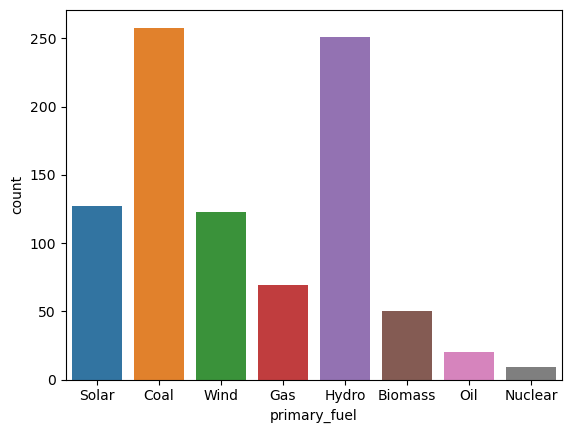

In [21]:
sns.countplot(data['primary_fuel'])

Maximum Number of powerplant are coal based powerplant and Hydro energy based powerplants

In [22]:
# lets find Total Power Generation Capacity of all Power Plants
print('Total Power Generation Capacity of all Power Plants:',data1['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 295884.946 MW


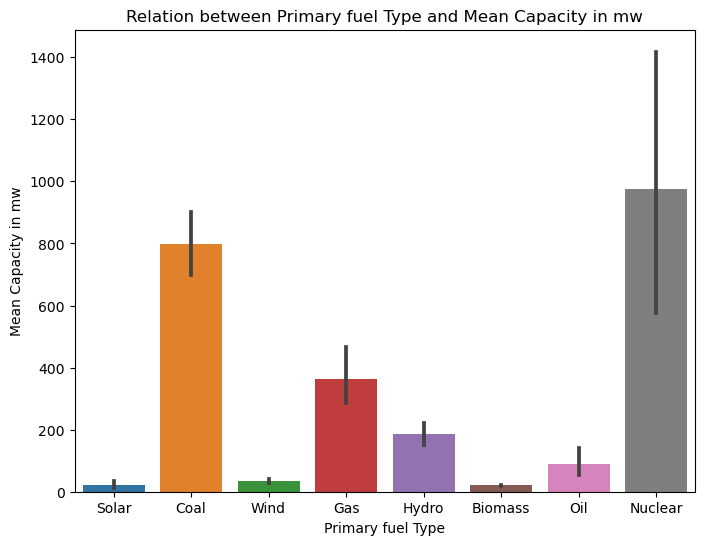

In [23]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (8,6))
y = data1["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = data1)
plt.title('Relation between Primary fuel Type and Mean Capacity in mw')
p.set_xlabel('Primary fuel Type')
p.set_ylabel('Mean Capacity in mw')
plt.show()

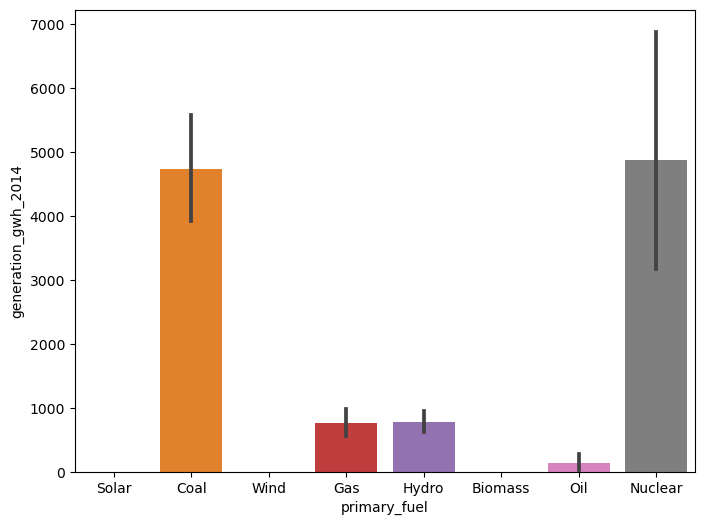

In [24]:
# Checking generation growth in 2014
plt.figure(figsize = (8,6))
sns.barplot(x='primary_fuel',y='generation_gwh_2014',data=data1)
plt.show()

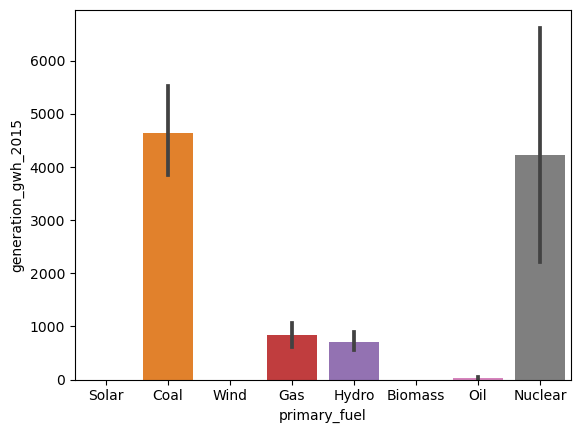

In [25]:
# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',data=data1)
plt.show()


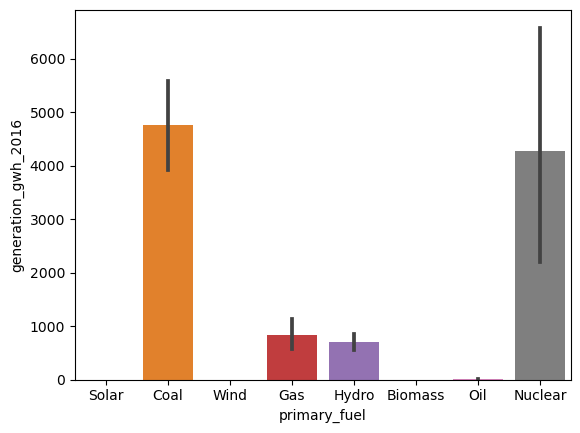

In [26]:
# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',data=data1)
plt.show()

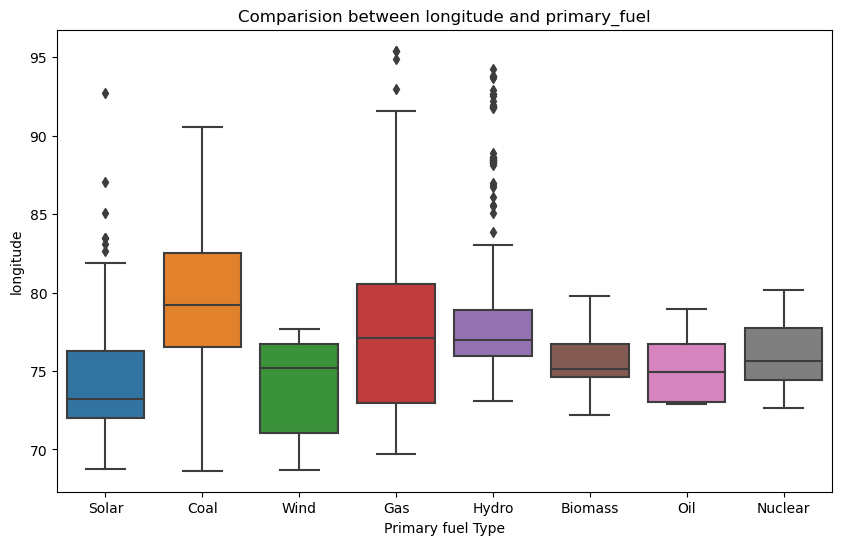

In [27]:
 # Let's check how the primary_fuel is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(data1['primary_fuel'],data1["longitude"])
a.set_xlabel('Primary fuel Type')
a.set_ylabel('longitude')
plt.show()

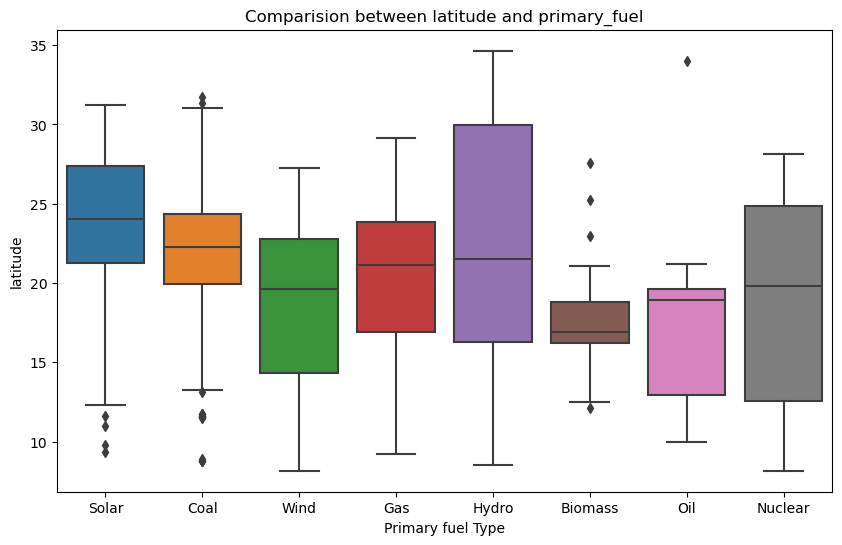

In [28]:
# Let's check how the primary_fuel is reated to Latitude of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and primary_fuel')
a = sns.boxplot(data1['primary_fuel'],data1["latitude"])
a.set_xlabel('Primary fuel Type')
a.set_ylabel('latitude')
plt.show()

These plants lies in between 15 to 25 latitude and longitudnal range of 75 to 88 degree

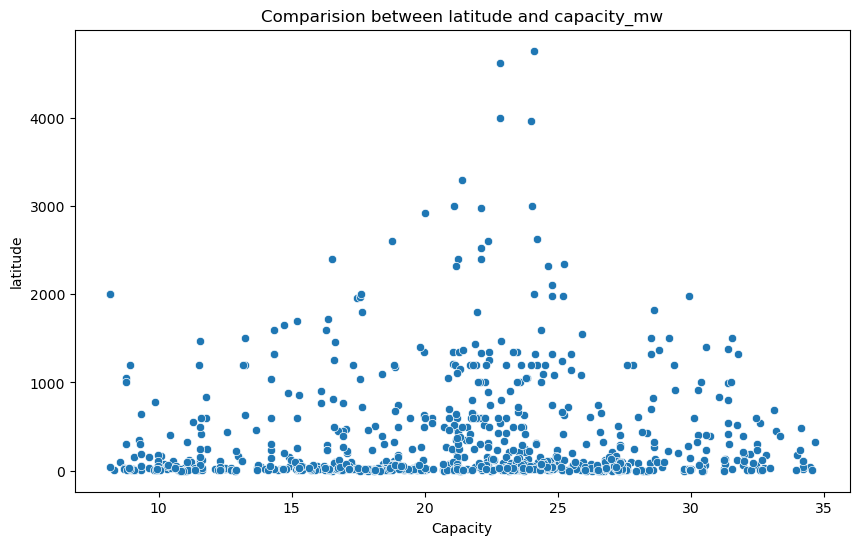

In [29]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and capacity_mw')
a= sns.scatterplot(data1['latitude'],data1["capacity_mw"])
a.set_xlabel('Capacity')
a.set_ylabel('latitude')
plt.show()

In [30]:
# Lets extract power plant age from commissioning year by subtracting it from the year 2018
data2 = data1.copy()
data2['Power_plant_age'] = 2018 - data2['commissioning_year']
data2.drop(columns=['commissioning_year'],inplace=True)

In [31]:
print('The oldest powerplant Age :',data2.Power_plant_age.max())
print('The youngest powerplant Age :',data2.Power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [32]:
data2.loc[data2.Power_plant_age==91]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,Power_plant_age
728,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,NaN,Central Electricity Authority,WRI,220.82035,215.3777,144.4143,175.92595,282.76905,Central Electricity Authority,91.0


Oldest Powerplant is SIVASAMUNDRUM which is hydro power based plant with generation capacity of 42 MW.

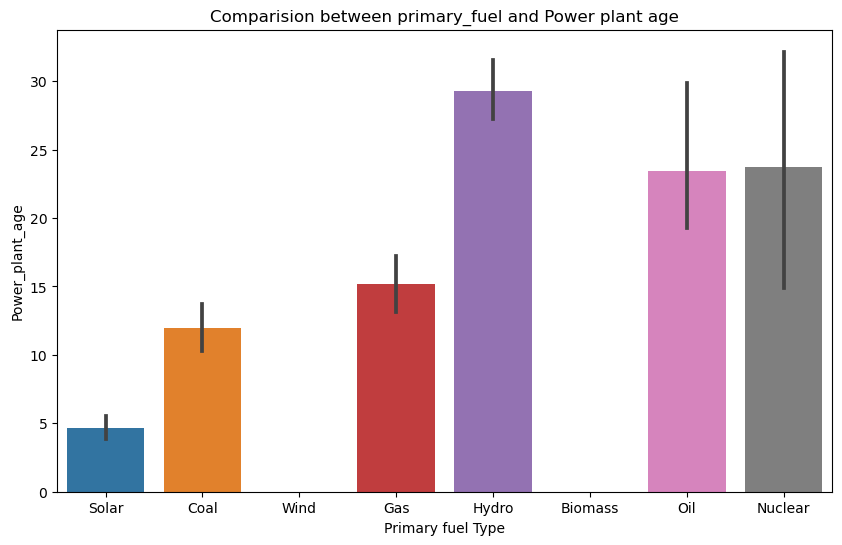

In [33]:
#Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age")
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = data2)
a.set_xlabel('Primary fuel Type')
a.set_ylabel('Power_plant_age')
plt.show()

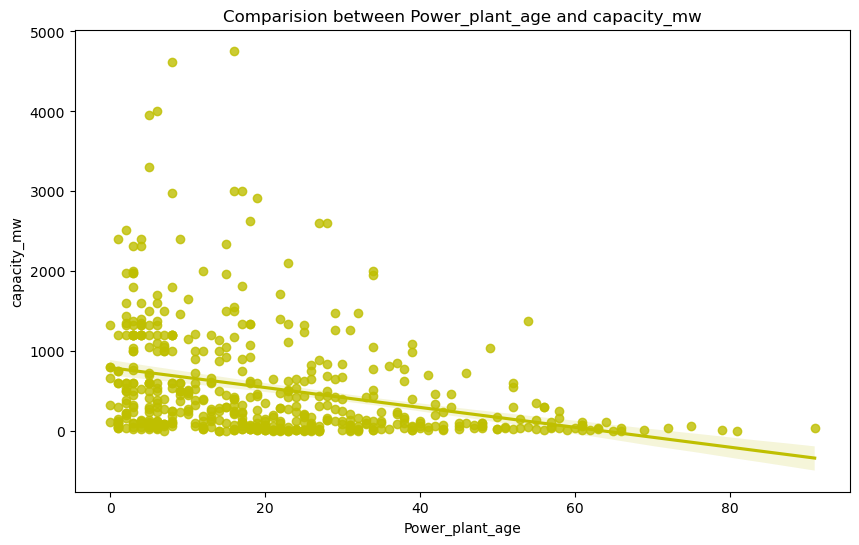

In [34]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(data2['Power_plant_age'],data2['capacity_mw'],color = "y")
plt.show()

There is negative linear relationship between feature and label.

we can say that the capacity of the older plants are less as compare to the new power plants.

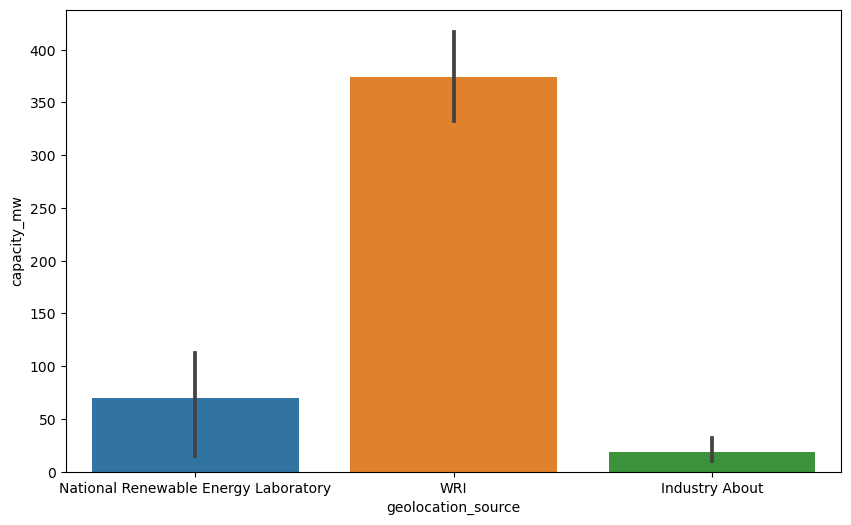

In [35]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = data2)
plt.show()

In [36]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']


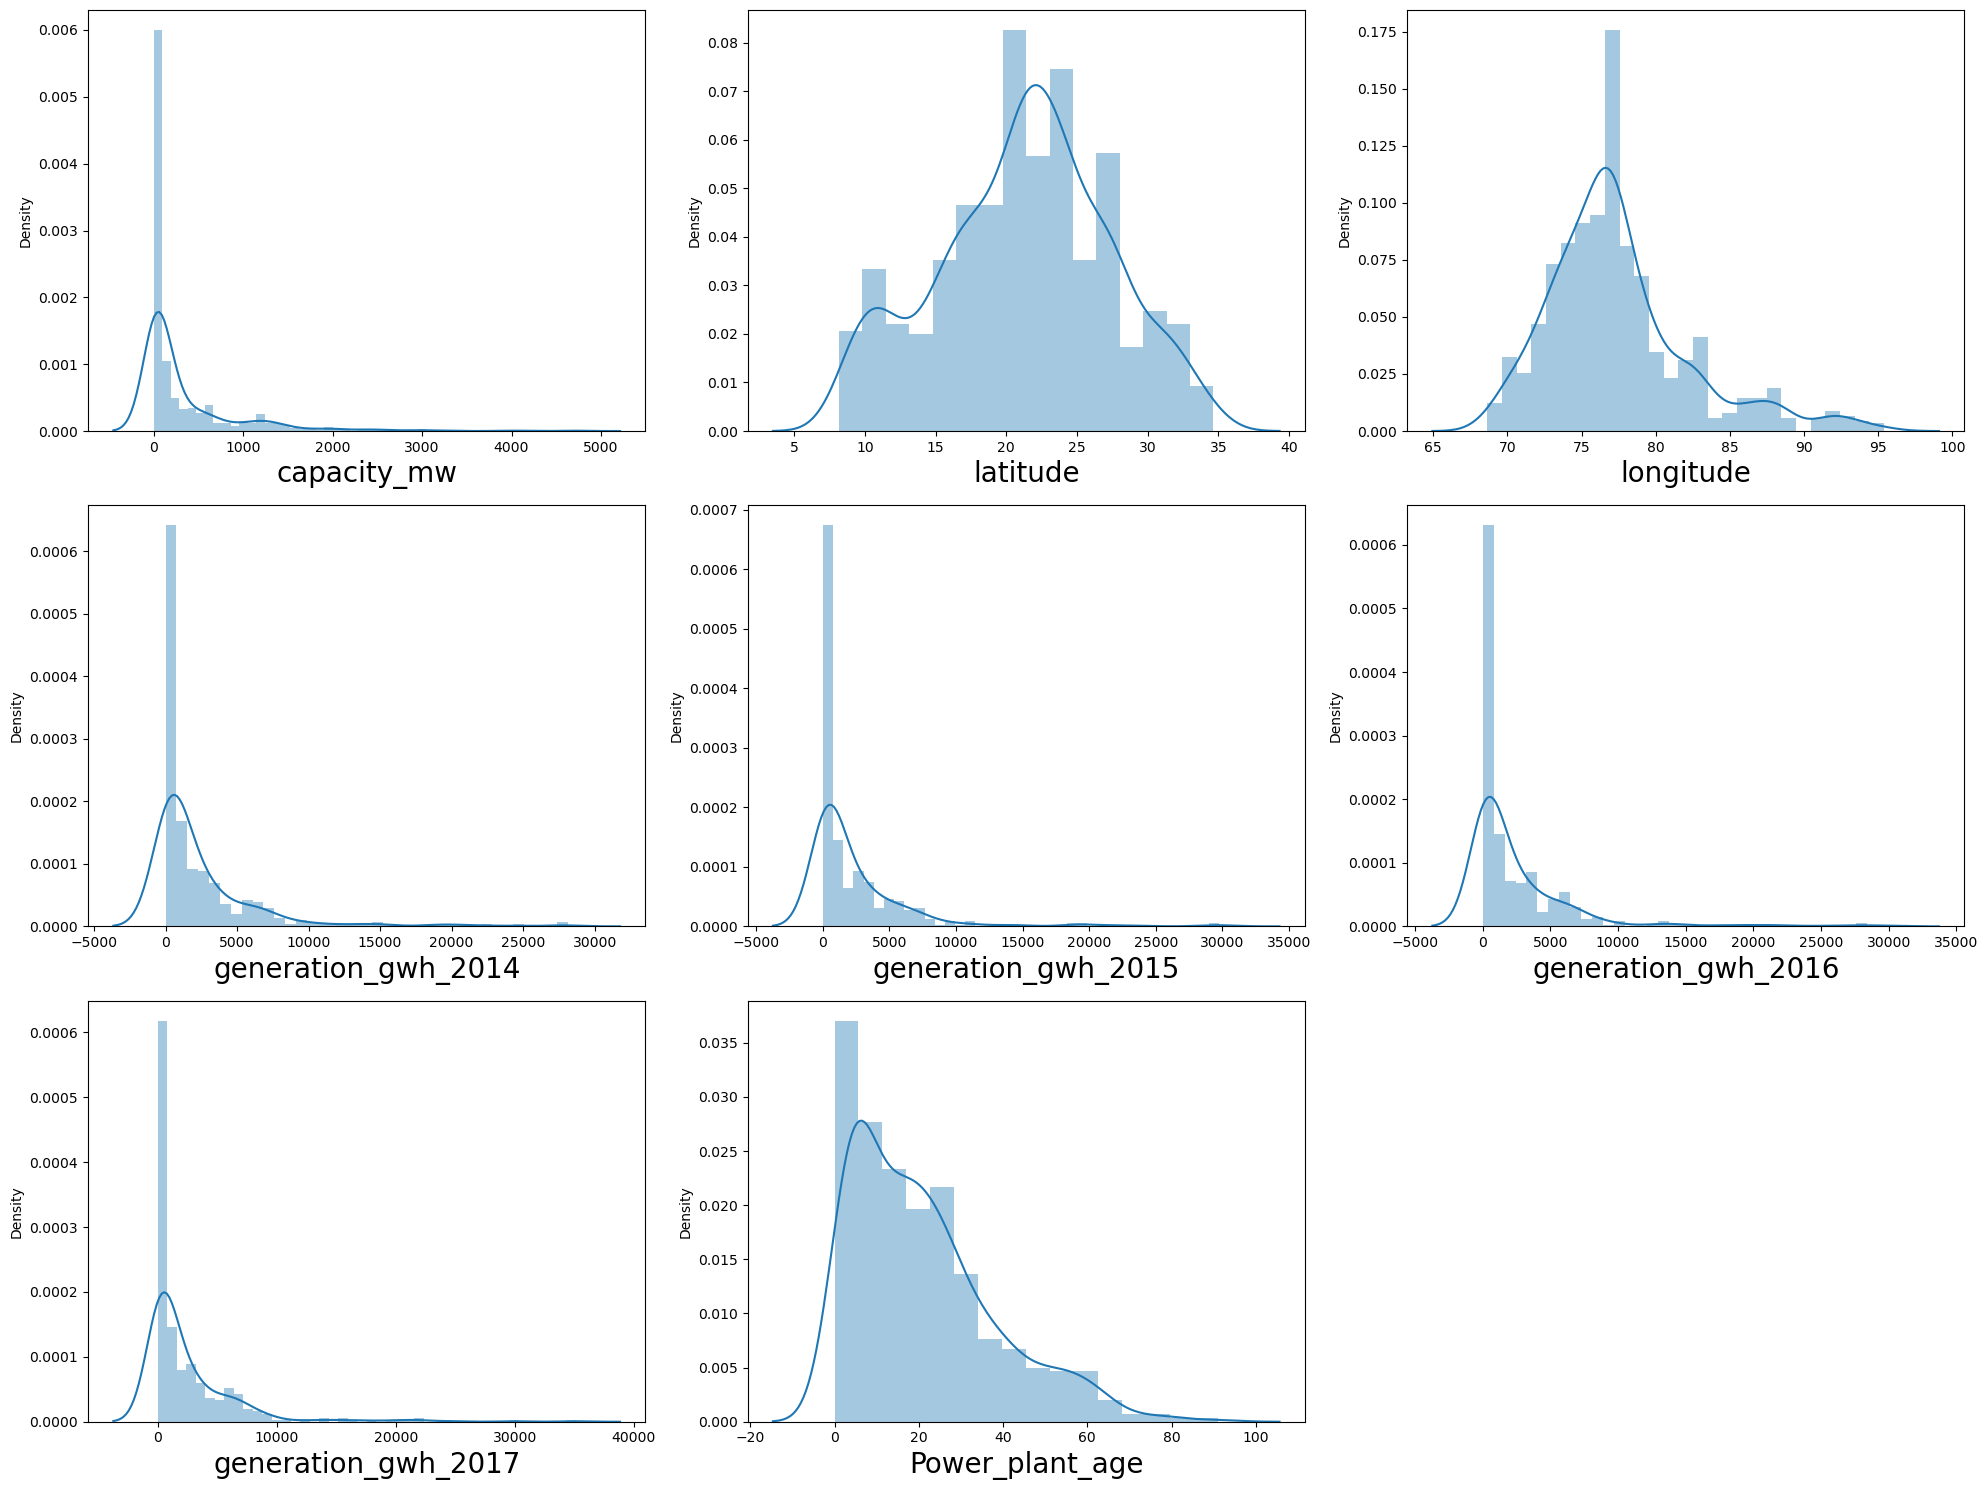

In [37]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(20,15))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data2[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

From the above distributionplot we can observe that the data is not normally distributed in all the columns except latitude and longitude.

In most of the columns the mean is greater than the median which means they are skewed to right.

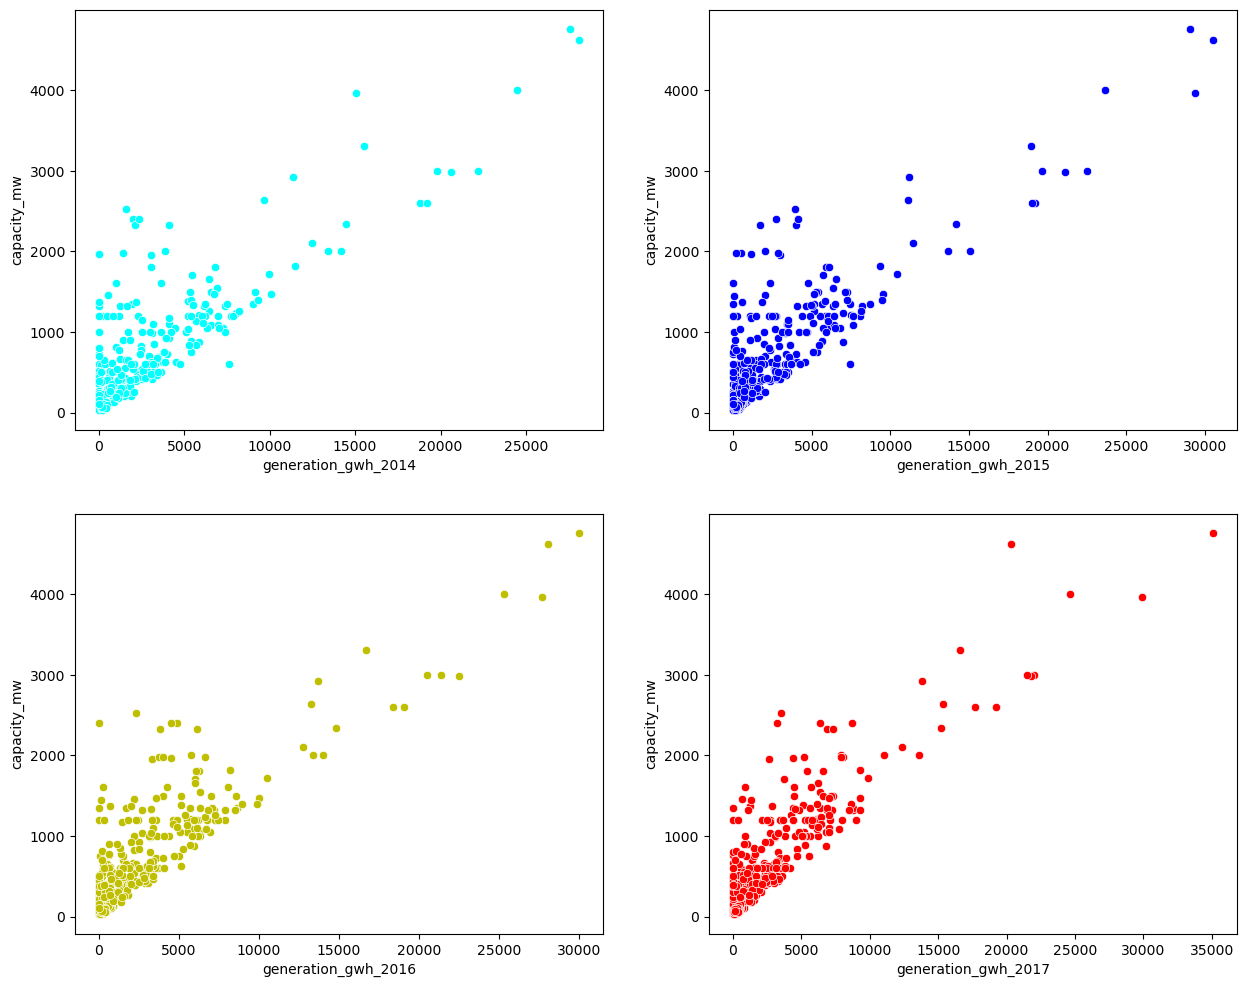

In [38]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=data2,color="cyan")

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=data2,color="b")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=data2,color="y")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=data2,color="r")
plt.show()

As the electricity generation growth increases, the capacity of plant also increases.

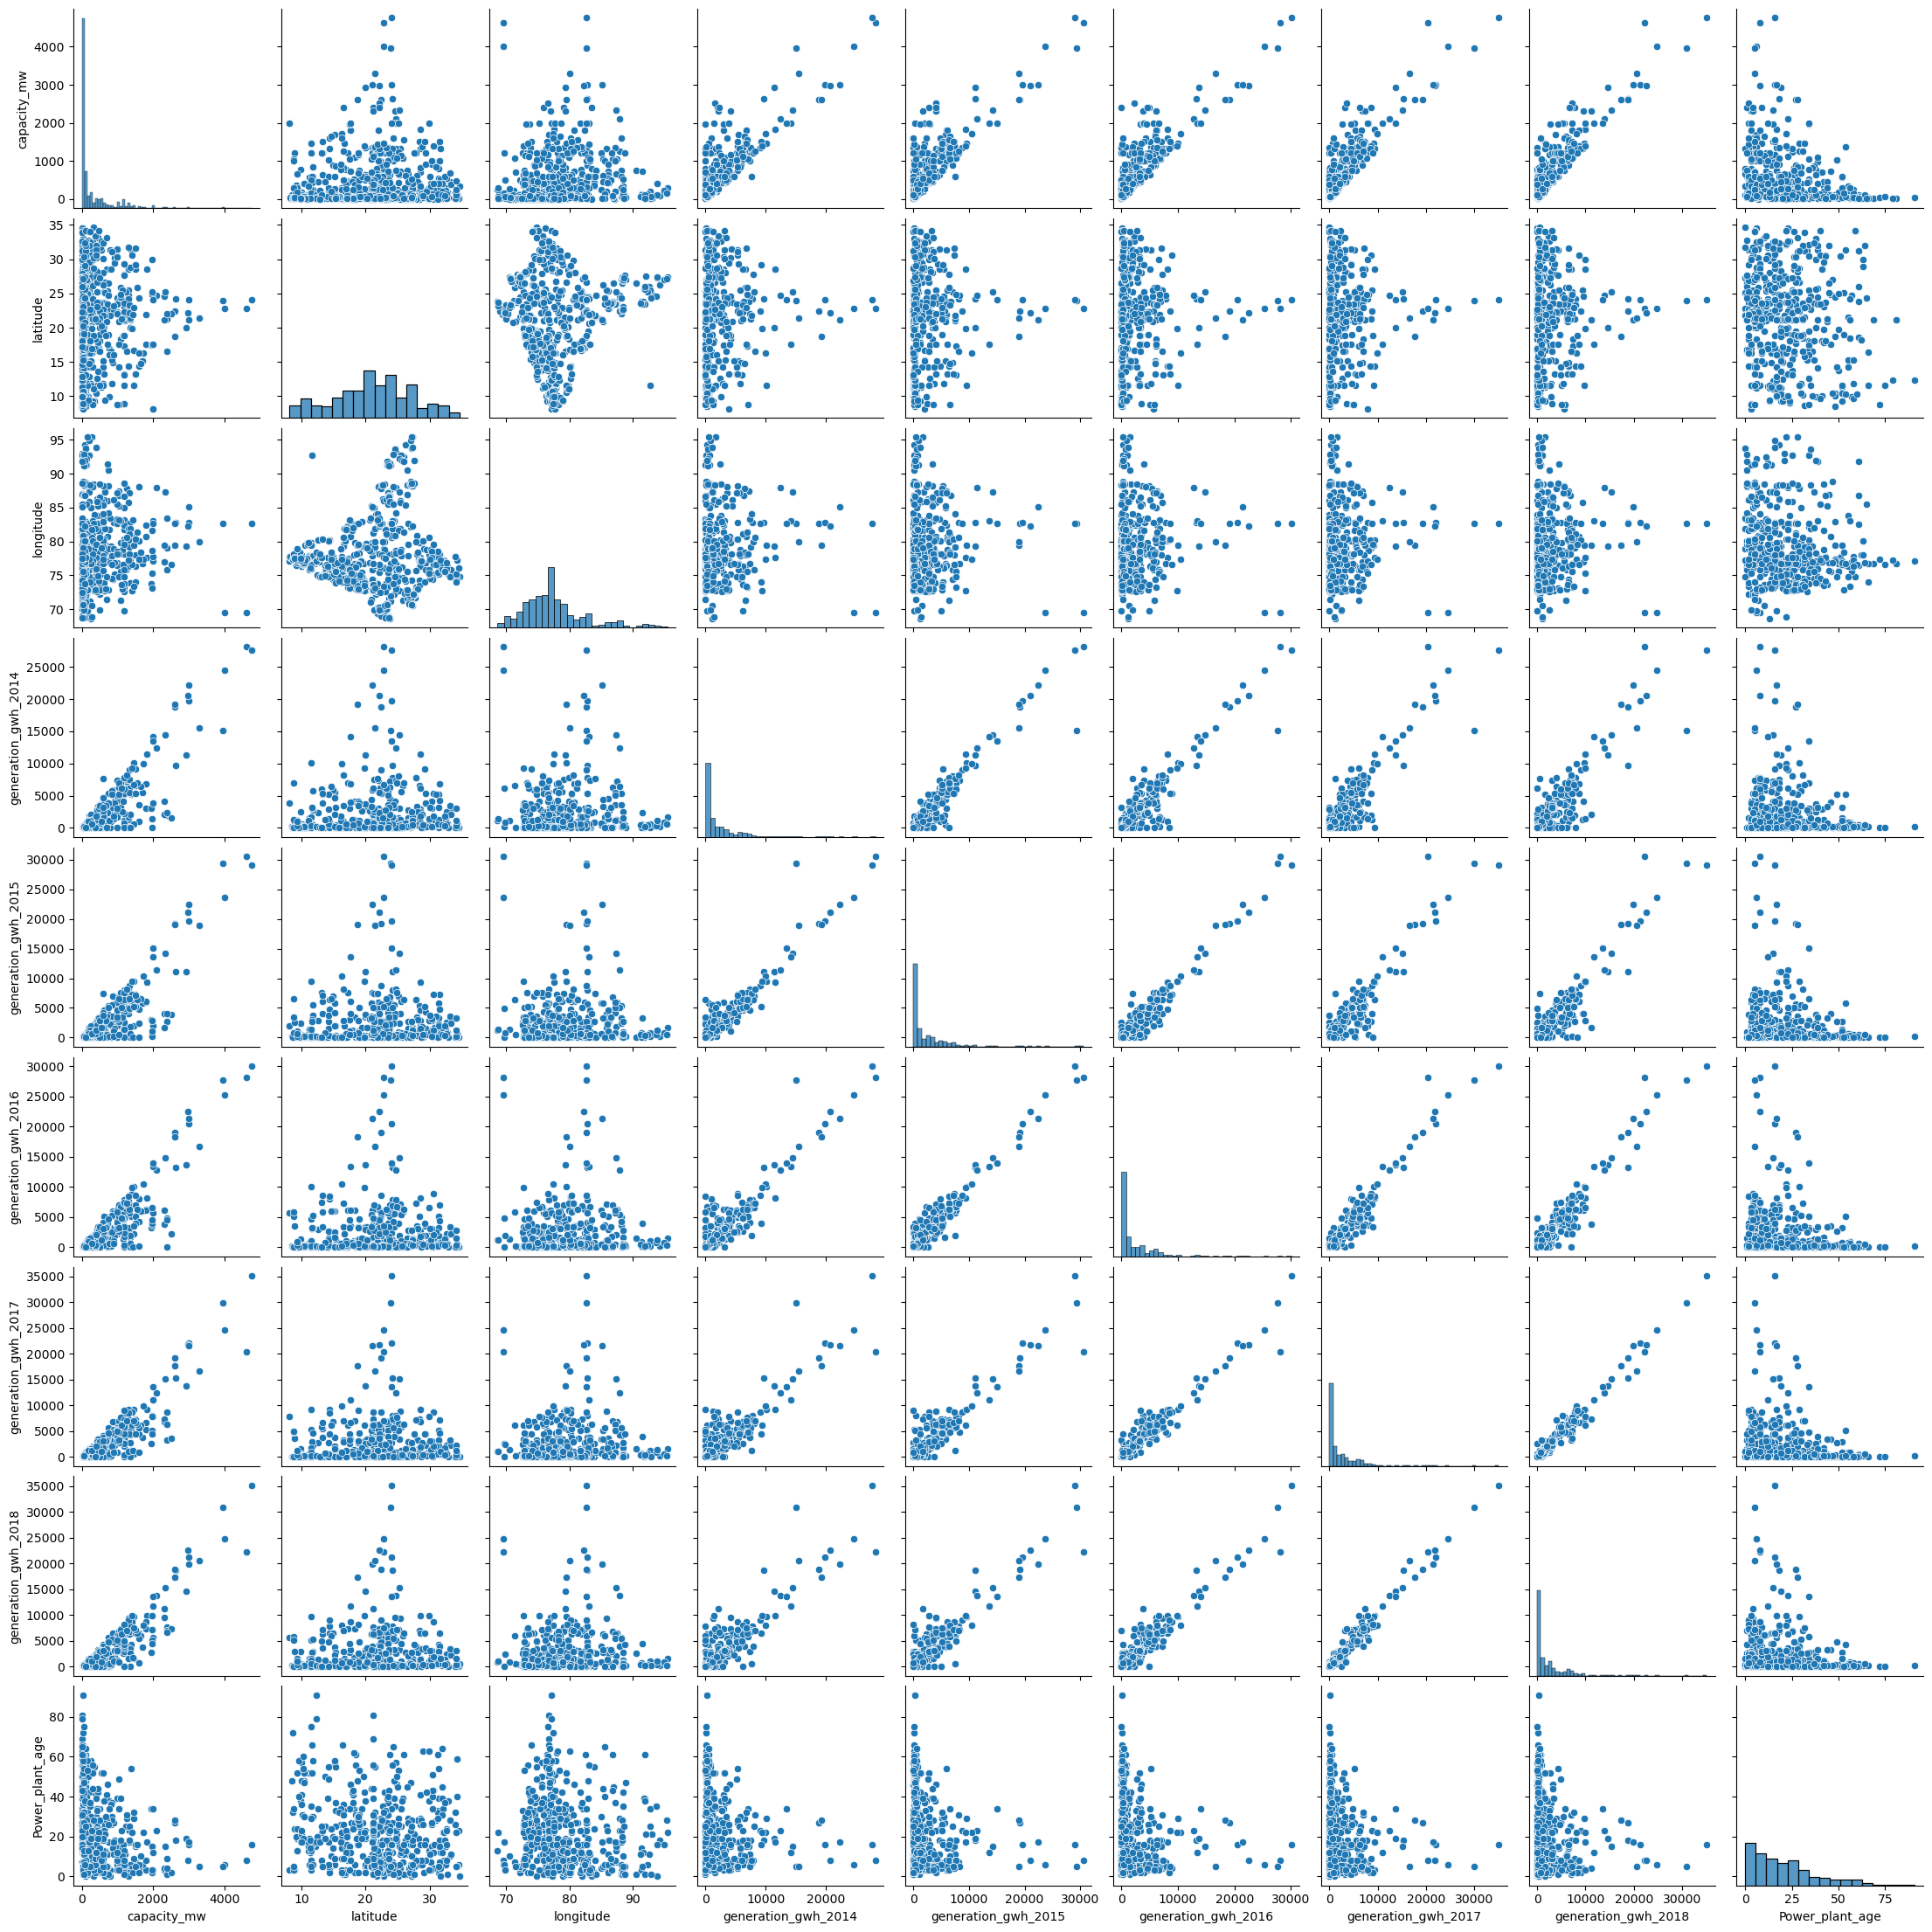

In [39]:
sns.pairplot(data2)

Most of the features have strong linear relationship and correlation with each other.

From the plot we can observe the outliers in some of the columns.


In [40]:
# Encoding the categorical columns
data3 = data2.copy()
data3.drop(columns=['name'],axis=1,inplace=True)
data3.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [41]:
data3.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,NaN,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,3.0


In [42]:
category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [43]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder()
for i in category:
    data3[i] = le.fit_transform(data3[i])
data3.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,617.789264,843.747,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,3.0


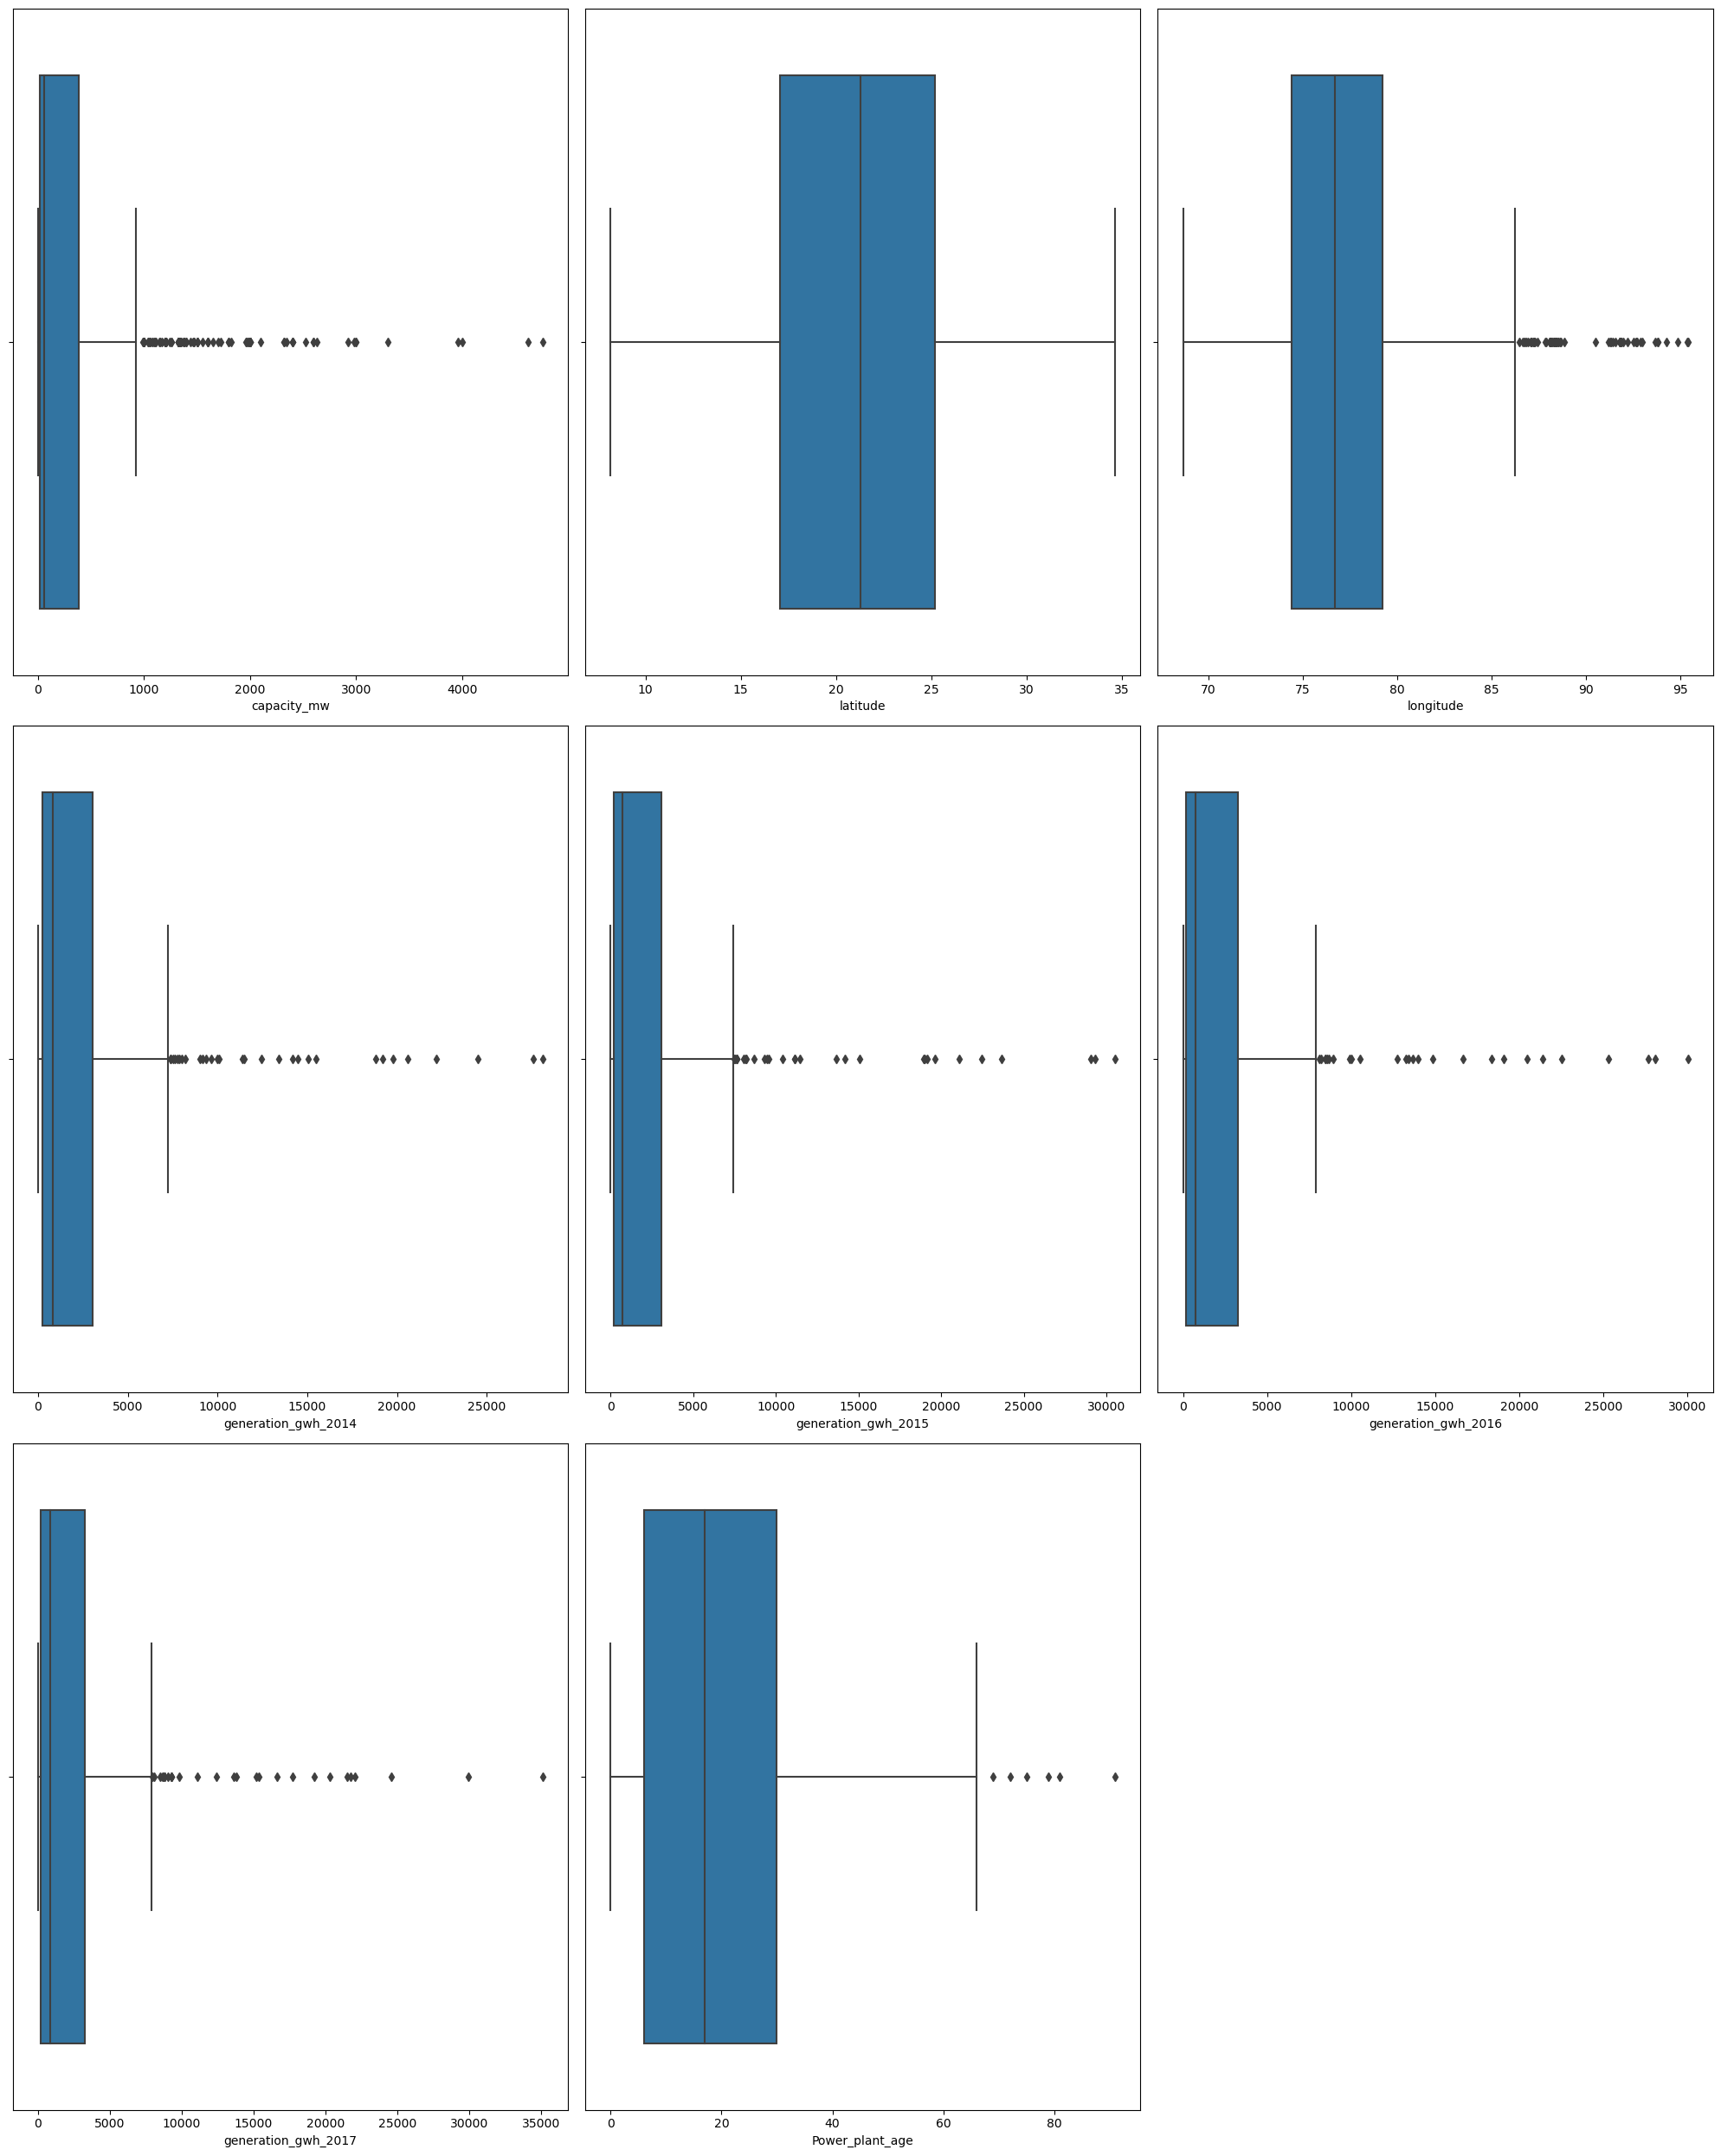

In [45]:
# Outliers detection using boxplot
plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data3[col])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

The outliers present in data.
There are no outliers in lower capping leve

In [46]:
# Removing unnessary columns
data3.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [47]:
data4 =  data3.copy()

In [48]:
df3=data4.copy()
Q1 = data4.quantile(0)
Q3= data4.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
Power_plant_age          39.00000
dtype: float64


In [49]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 11)


In [50]:
print('Percentage Data Loss :',((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


<AxesSubplot:>

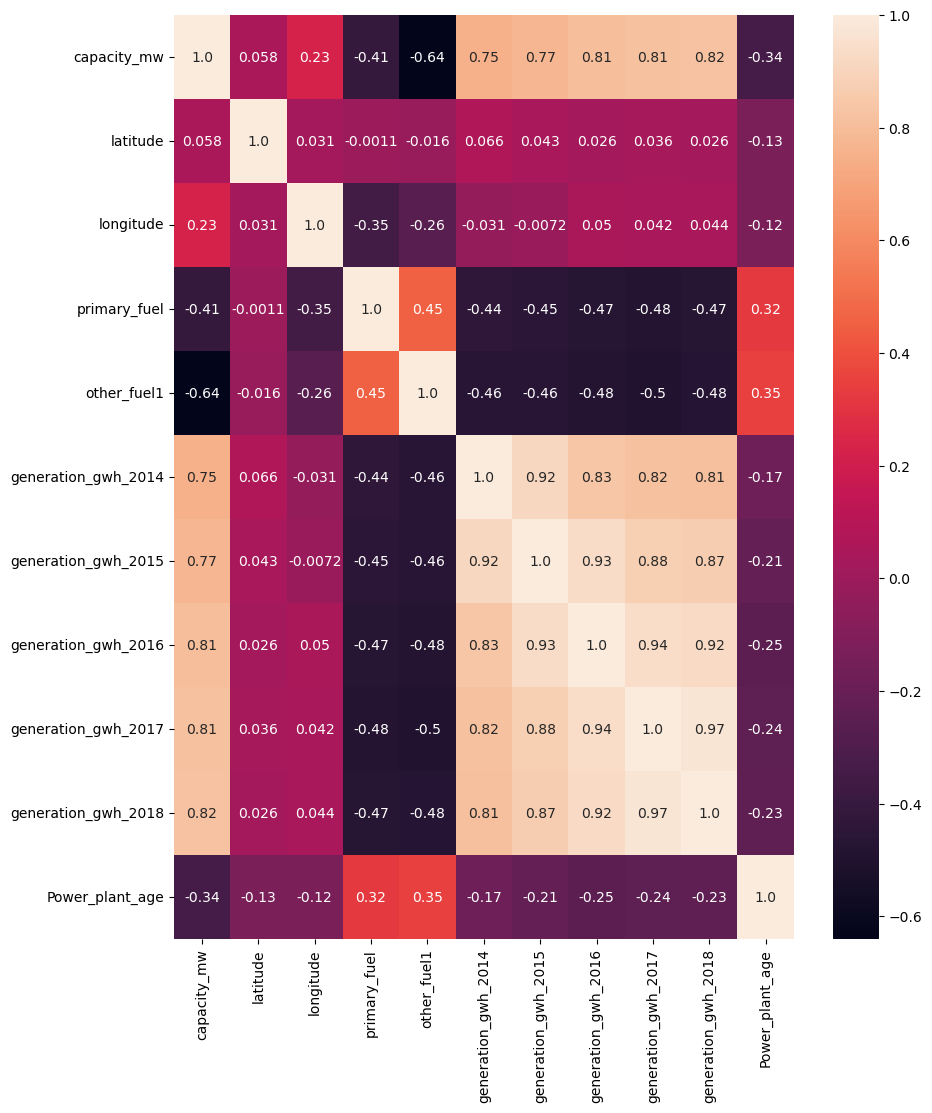

In [51]:
plt.figure(figsize = (10 ,12))
sns.heatmap(data.corr(), annot = True,fmt = ".2")

The label capacity_mw is highly positively correlated with the features generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014.

capaity is negatively correlated with the features primary_fuel, source and Powe_plant_age.


In [52]:
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              1.221398
primary_fuel           0.425807
other_fuel1           -1.831505
generation_gwh_2014    1.610443
generation_gwh_2015    1.536958
generation_gwh_2016    1.594947
generation_gwh_2017    1.489783
generation_gwh_2018    1.532123
Power_plant_age        1.030123
dtype: float64

In [53]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [54]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.933334,0.493934,NaN,NaN,NaN,NaN,NaN,-0.803265
1,-0.516718,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.413165,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
3,2.166057,0.493934,-0.115824,0.109529,0.134579,-0.043225,-0.071963,-0.178934
4,1.147361,-2.024155,0.916782,1.451544,1.495059,1.348860,1.596280,-1.370997


In [55]:
data.skew()


capacity_mw            1.945405
latitude              -0.129362
longitude              0.002120
primary_fuel           0.425807
other_fuel1           -1.533254
generation_gwh_2014   -0.134464
generation_gwh_2015   -0.142379
generation_gwh_2016   -0.136447
generation_gwh_2017   -0.155373
generation_gwh_2018   -0.158394
Power_plant_age       -0.075616
dtype: float64

In [56]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)

In [57]:
# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [58]:
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)
data.drop("generation_gwh_2018",axis=1,inplace=True)


In [66]:
# Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score

In [67]:
# spliting the data set
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [68]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (613, 4)
Training target vector size: (613,)
Test feature matrix size: (264, 4)
Test target vector size: (264,)


In [71]:
#best Random state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

In [72]:
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)


Best accuracy is 0.6098484848484849 on Random_state 517


In [74]:
#Logistic Regression model
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('Logistics Regression Evaluation')
print('\n')
print('Accuracy Score of Logistics Regression :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of Logistics Regression :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of Logistics Regression',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.48863636363636365


Confusion matrix of Logistics Regression : [[ 0  0  0  1  0  0  1 10]
 [ 0 43  0 20  0  0  3  3]
 [ 0  8  0  7  0  0  0  3]
 [ 0 21  0 43  0  0  0  8]
 [ 0  2  0  2  0  0  0  0]
 [ 0  0  0  3  0  0  0  2]
 [ 0  0  0  9  0  0 23  8]
 [ 0  1  0  8  0  0 15 20]]


classification Report of Logistics Regression               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.57      0.62      0.60        69
           2       0.00      0.00      0.00        18
           3       0.46      0.60      0.52        72
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.55      0.57      0.56        40
           7       0.37      0.45      0.41        44

    accuracy                           0.49       264
   macro avg       0.24      0.28      0.26       264

In [76]:
#Logistic Regression Model
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('Logistics Regression Evaluation')
print('\n')
print('Accuracy Score of Logistics Regression :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of Logistics Regression :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of Logistics Regression',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.48863636363636365


Confusion matrix of Logistics Regression : [[ 0  0  0  1  0  0  1 10]
 [ 0 43  0 20  0  0  3  3]
 [ 0  8  0  7  0  0  0  3]
 [ 0 21  0 43  0  0  0  8]
 [ 0  2  0  2  0  0  0  0]
 [ 0  0  0  3  0  0  0  2]
 [ 0  0  0  9  0  0 23  8]
 [ 0  1  0  8  0  0 15 20]]


classification Report of Logistics Regression               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.57      0.62      0.60        69
           2       0.00      0.00      0.00        18
           3       0.46      0.60      0.52        72
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.55      0.57      0.56        40
           7       0.37      0.45      0.41        44

    accuracy                           0.49       264
   macro avg       0.24      0.28      0.26       264

In [77]:
# Decision Tree Classifier
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('DecisionTreeClassifier Evaluation')
print('\n')
print('Accuracy Score of DecisionTreeClassifier :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of DecisionTreeClassifier :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of DecisionTreeClassifier',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.6666666666666666


Confusion matrix of DecisionTreeClassifier : [[ 6  3  0  0  0  0  1  2]
 [ 1 42  5 11  0  3  4  3]
 [ 0  2  6  7  0  2  0  1]
 [ 0  5  6 60  0  0  1  0]
 [ 0  2  1  1  0  0  0  0]
 [ 0  1  2  1  0  1  0  0]
 [ 1  4  0  0  0  0 33  2]
 [ 3  2  1  0  0  0 10 28]]


classification Report of DecisionTreeClassifier               precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.69      0.61      0.65        69
           2       0.29      0.33      0.31        18
           3       0.75      0.83      0.79        72
           4       0.00      0.00      0.00         4
           5       0.17      0.20      0.18         5
           6       0.67      0.82      0.74        40
           7       0.78      0.64      0.70        44

    accuracy                           0.67       264
   macro avg       0.49      0.49      0.49   

In [78]:
# Random Forest Classifier
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('RandomForestClassifier Evaluation')
print('\n')
print('Accuracy Score of RandomForestClassifier :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of RandomForestClassifier :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of RandomForestClassifier',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.7424242424242424


Confusion matrix of RandomForestClassifier : [[ 8  3  0  0  0  0  1  0]
 [ 3 52  4  8  0  1  0  1]
 [ 0  5  6  6  0  0  0  1]
 [ 0  5  3 63  0  0  0  1]
 [ 0  2  1  1  0  0  0  0]
 [ 0  1  0  3  0  1  0  0]
 [ 0  3  0  0  0  0 33  4]
 [ 2  1  0  0  0  0  8 33]]


classification Report of RandomForestClassifier               precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.72      0.75      0.74        69
           2       0.43      0.33      0.38        18
           3       0.78      0.88      0.82        72
           4       0.00      0.00      0.00         4
           5       0.50      0.20      0.29         5
           6       0.79      0.82      0.80        40
           7       0.82      0.75      0.79        44

    accuracy                           0.74       264
   macro avg       0.58      0.55      0.56   

In [79]:
# Extra Trees 
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('ExtraTreesClassifier Evaluation')
print('\n')
print('Accuracy Score of ExtraTreesClassifier :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of ExtraTreesClassifier :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of ExtraTreesClassifier',classification_report(Y_test, y_pred))

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.7765151515151515


Confusion matrix of ExtraTreesClassifier : [[ 8  2  0  0  0  0  1  1]
 [ 0 53  7  7  0  1  0  1]
 [ 0  4 11  3  0  0  0  0]
 [ 0  6  3 62  0  0  0  1]
 [ 0  3  0  1  0  0  0  0]
 [ 0  1  0  2  0  2  0  0]
 [ 6  2  0  0  0  0 32  0]
 [ 1  2  0  0  0  0  4 37]]


classification Report of ExtraTreesClassifier               precision    recall  f1-score   support

           0       0.53      0.67      0.59        12
           1       0.73      0.77      0.75        69
           2       0.52      0.61      0.56        18
           3       0.83      0.86      0.84        72
           4       0.00      0.00      0.00         4
           5       0.67      0.40      0.50         5
           6       0.86      0.80      0.83        40
           7       0.93      0.84      0.88        44

    accuracy                           0.78       264
   macro avg       0.63      0.62      0.62       264


In [82]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('Cross Validation Score', m, ':')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :
Score : [0.55681818 0.48295455 0.51428571 0.53142857 0.51428571]
Mean Score : 0.5199545454545454
Std deviation : 0.024182027423871873




Cross Validation Score DecisionTreeClassifier() :
Score : [0.69318182 0.64204545 0.73714286 0.72       0.65142857]
Mean Score : 0.6887597402597402
Std deviation : 0.037181380440242696




Cross Validation Score RandomForestClassifier() :
Score : [0.73863636 0.77272727 0.78857143 0.76       0.74857143]
Mean Score : 0.7617012987012987
Std deviation : 0.017611672941018792




Cross Validation Score ExtraTreesClassifier() :
Score : [0.73863636 0.78409091 0.81142857 0.79428571 0.77142857]
Mean Score : 0.779974025974026
Std deviation : 0.024466257170282793




We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

### Hyper Parameter Tuning : GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [84]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=aut

[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.650 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.664 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.721 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[C

[CV 4/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.762 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.730 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=0.740 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=0.715 total time=   0.2s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=0.707 total time=   0.2s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=0.762 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=0.705 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=5;, score=nan total 

[CV 5/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50;, score=0.730 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.764 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.732 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.691 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.779 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.705 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=70;, score=0.756 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=70;, score=0.707 tot

[CV 1/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.724 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.683 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.754 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.697 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=60;, score=0.732 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=60;, score=0.748 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=60;, score=0.707 tot

[CV 5/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.705 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.756 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.715 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.699 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.770 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.721 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=60;, score=0.764 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=60;, score=0.724 tot

[CV 1/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.732 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.715 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.715 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.754 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.713 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50;, score=0.740 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50;, score=0.724 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50;, score=0.715 tot

[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.715 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.634 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.659 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.730 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.713 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50;, score=0.699 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50;, score=0.626 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50;,

[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.730 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.732 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.732 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.707 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.730 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.721 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25;, score=0.764 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimat

[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.754 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.672 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.732 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.732 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.667 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.762 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.713 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimat

[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.730 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.754 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.675 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.683 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.746 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.680 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimat

[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.746 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.680 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.732 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.732 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.691 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.713 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.705 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimat

[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.730 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.705 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.699 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.724 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.667 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.754 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.680 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimat

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [85]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 25}

## Final Classification model

In [87]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators=25, max_depth=10 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

Accuracy Score : 0.7159090909090909


In [88]:
y_prob = Final_mod.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.874298 (macro),
0.896709 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.888459 (macro),
0.935685 (weighted by prevalence)


In [89]:
import joblib
joblib.dump(Final_mod,'powerplant_classification_Final.obj')

['powerplant_classification_Final.obj']

### Machine Learning Model For Regression

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso

In [95]:
data4 =  data3.copy()

In [96]:
df3=data4.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
Power_plant_age          39.00000
dtype: float64


In [97]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 11)


In [98]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2018','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2018,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.933334,0.493934,NaN,NaN,NaN,NaN,NaN,-0.803265
1,-0.516718,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.413165,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
3,2.166057,0.493934,-0.115824,0.109529,-0.071963,0.134579,-0.043225,-0.178934
4,1.147361,-2.024155,0.916782,1.451544,1.596280,1.495059,1.348860,-1.370997


In [99]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)
# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [101]:
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)
data.drop("generation_gwh_2018",axis=1,inplace=True)

In [102]:
# Splitting data in target and dependent feature
X = data.drop(['capacity_mw'], axis =1)
Y = data['capacity_mw']

In [103]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (587, 4)
Training target vector size: (587,)
Test feature matrix size: (290, 4)
Test target vector size: (290,)


In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.32142351199370456 on Random_state 66


In [106]:
# Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=91, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [ 8.96267957e+01  1.14217617e+00  3.57360468e+02  6.10323774e+02
  8.82090261e+01  3.41867292e+02  2.79943353e-01  6.03620820e+02
  7.06270454e+01  3.43809233e+02  4.12210557e+02  1.86236208e+02
  4.51119528e+02  5.92415895e+02  4.07595486e+02  1.84291953e+01
  4.37119258e+02  4.17669858e+02  1.35277613e+02  3.61669502e+00
  2.12481810e+02  2.22686881e+02  7.00029948e+01  7.01358663e+01
  2.71708626e+02  5.14724101e+01  3.55468501e+01  2.63776527e+02
  3.24221185e+02  4.69618801e+02  5.14574258e+01  6.09169066e+02
  3.62041388e+02  1.10294468e+02  1.47126198e+02  3.09804422e+02
  4.02589629e+02  4.00424214e+02  5.41381589e+02  5.37924562e+02
  1.10900965e+01  1.97597922e+02  1.84920533e+02  4.48842163e+02
  2.48149462e+02  3.45494206e+02  5.48584546e+01  6.31237472e+00
  4.08274205e+02  1.29253938e+00  3.37164392e+02  1.20083264e+02
  1.44989440e+02  3.75070867e+02  6.79394069e+02  2.70559179e+02
  5.55398489e+02 -6.76222451e+01  6.17589171e+01  3.18621136e+02
  7.1274

In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('Error :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print(' R2 Score :')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

Error :
Mean absolute error : 231.9001421367643
Mean squared error : 121621.09104031282
Root Mean Squared Error: 348.74215552512834


 R2 Score :
0.2118236454003275


In [113]:
# Other Algorithms
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
model = [rf,rd,dtc,adb,gradb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print(' Error of ', m, ':')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('R2 Score :')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 165.86633859447215
Mean squared error : 81939.3145213746
Root Mean Squared Error: 286.25044021166957


R2 Score :
0.46898494606954044


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 231.89963356419463
Mean squared error : 121620.98598474874
Root Mean Squared Error: 348.7420049044117


R2 Score :
0.21182432622230352


 Error of  DecisionTreeRegressor() :
Mean absolute error : 197.8821284965035
Mean squared error : 128342.17500640632
Root Mean Squared Error: 358.2487613466463


R2 Score :
0.1682670598275341


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 184.23639809189774
Mean squared error : 81869.52125441463
Root Mean Squared Error: 286.1285047918411


R2 Score :
0.46943724757627403


 Error of  GradientBoostingRegressor() :
Mean absolute error : 169.784035352975
Mean squared error : 82173.28638691068
Root Mean Squared Error: 286.6588327383454


R2 Score :
0.46746867047556484


In [115]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('Cross Validation Score :',m,":")
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :
Mean CV Score : 0.5087328921716308


Cross Validation Score : Ridge(alpha=0.01) :
Mean CV Score : 0.22748377028159927


Cross Validation Score : DecisionTreeRegressor() :
Mean CV Score : 0.21194623689260536


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :
Mean CV Score : 0.4676811416512955


Cross Validation Score : GradientBoostingRegressor() :
Mean CV Score : 0.4920773565711688


Among all Model Random Forest Regressor gave us maximum R2 score and minimum RMSE value . So We will perform Hyper Parameter Tuning on Random Forest Regressor.

In [128]:
#Final Regression Model
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=80 , max_depth= 40, max_features = 'sqrt')
             
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('Error in Final Model :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('R2 Score of Final Model :')
print(r2_score(Y_test,y_pred)) 
print('\n')



Error in Final Model :
Mean absolute error : 160.15943797054254
Mean squared error : 77767.34523917294
Root Mean Squared Error: 278.86797098120275


R2 Score of Final Model :
0.49602176601763304




In [129]:
# Final Regression Model
import joblib
joblib.dump(Final_mod,'Powerplant_regression_Final.pkl')

['Powerplant_regression_Final.pkl']